<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/7_exercicio_modelos_classificacao/exercicio_modelos_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Modelos de Classificação

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml


## iris

In [2]:
# carregar o dataset
iris = datasets.load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# adicionar a coluna de target (rótulos das classes)
df_iris['target'] = iris.target

df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Questões

#### a.
Faça uma análise inicial sobre esse dataset

In [3]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


#### b.
Use o boxplot e o histograma para caracterizar as propriedades de cada uma das espécies existentes.

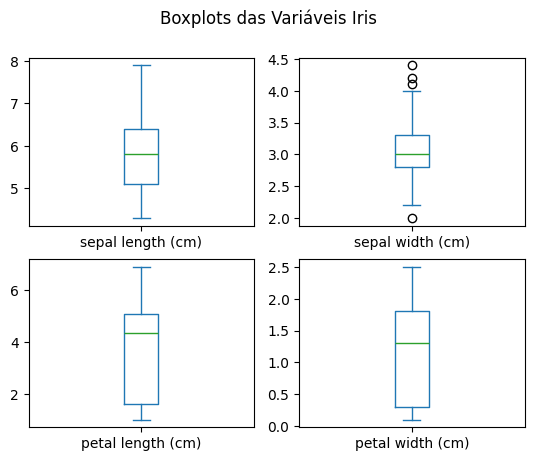

In [4]:
df_iris.drop('target', axis=1).plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.suptitle('Boxplots das Variáveis Iris')
plt.show()

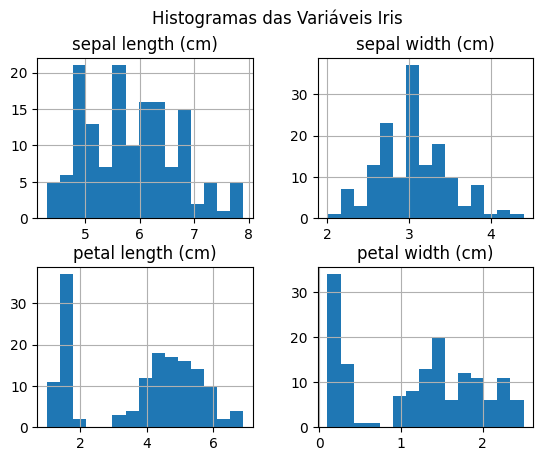

In [5]:
df_iris.drop('target', axis=1).hist(bins=15)
plt.suptitle('Histogramas das Variáveis Iris')
plt.show()

#### c.
Somente olhando esses gráficos, é possível afirmar que uma ou mais propriedades (Sepal_Length, Sepal_Width, Petal_Length, Petal_Width) são suficientes para distinguir as
espécies?

<font color='blue'>O cumprimento possui grande variação e dispersão.</font>

#### d.
Aplique a regressão logística para avaliar o modelo de classificação.

In [6]:
X = df_iris.drop('target', axis=1)
y = df_iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# modelo
model_iris = LogisticRegression(max_iter=200)
model_iris.fit(X_train, y_train)

# predição
y_pred_iris = model_iris.predict(X_test)


#### e.
Calcule a acurácia, precisão e recall.

In [7]:
print("Acurácia:", accuracy_score(y_test, y_pred_iris))
print("Precisão (macro):", precision_score(y_test, y_pred_iris, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_iris, average='macro'))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_iris))


Acurácia: 0.9333333333333333
Precisão (macro): 0.9345238095238096
Recall (macro): 0.9333333333333332

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.88      0.93      0.90        15
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45



#### f.
Plote a matriz de confusão com matplotlib ou seaborn.

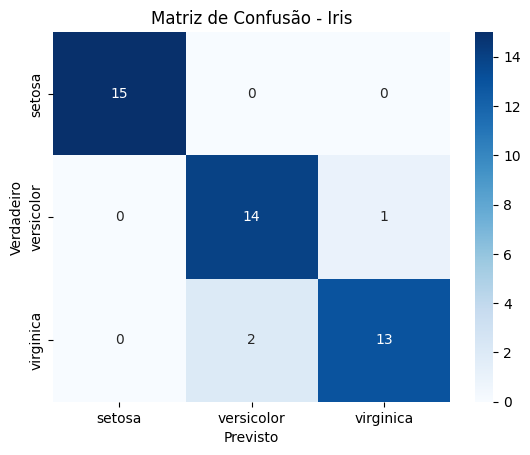

In [8]:
cm_iris = confusion_matrix(y_test, y_pred_iris)

sns.heatmap(cm_iris, annot=True, fmt="d", cmap="Blues",
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)

plt.title("Matriz de Confusão - Iris")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()


## digits

In [9]:
load_digits = datasets.load_digits()
# load_digits.keys()
df_digits = pd.DataFrame(load_digits.data, columns=load_digits.feature_names)
df_digits['target'] = load_digits.target
df_digits.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


### Questões

#### a.
Faça uma análise inicial sobre esse dataset:

i. Quantos dados possui?

ii. Existem dados nulos? Se sim quantos?

iii. Todos são dados numéricos ou existem colunas com dados
categóricos?

In [10]:
df_digits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1797 entries, 0 to 1796
Data columns (total 65 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pixel_0_0  1797 non-null   float64
 1   pixel_0_1  1797 non-null   float64
 2   pixel_0_2  1797 non-null   float64
 3   pixel_0_3  1797 non-null   float64
 4   pixel_0_4  1797 non-null   float64
 5   pixel_0_5  1797 non-null   float64
 6   pixel_0_6  1797 non-null   float64
 7   pixel_0_7  1797 non-null   float64
 8   pixel_1_0  1797 non-null   float64
 9   pixel_1_1  1797 non-null   float64
 10  pixel_1_2  1797 non-null   float64
 11  pixel_1_3  1797 non-null   float64
 12  pixel_1_4  1797 non-null   float64
 13  pixel_1_5  1797 non-null   float64
 14  pixel_1_6  1797 non-null   float64
 15  pixel_1_7  1797 non-null   float64
 16  pixel_2_0  1797 non-null   float64
 17  pixel_2_1  1797 non-null   float64
 18  pixel_2_2  1797 non-null   float64
 19  pixel_2_3  1797 non-null   float64
 20  pixel_2_

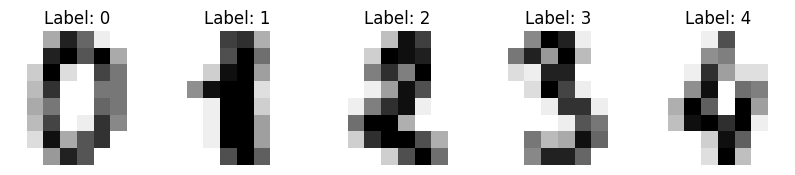

In [11]:
# Mostrar 5 imagens dos dígitos
fig, axes = plt.subplots(1, 5, figsize=(10,3))
for ax, image, label in zip(axes, load_digits.images, load_digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)
plt.show()


#### b.
Aplique a regressão logística para construir e avaliar o modelo de classificação.

In [12]:
X = df_digits.drop('target', axis=1)
y = df_digits['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# modelo
model_digits = LogisticRegression(max_iter=1000)
model_digits.fit(X_train, y_train)

# predição
y_pred_digits = model_digits.predict(X_test)


#### c.
Calcule a acurácia, precisão e recall com base no desempenho do modelo.

In [13]:
print("Acurácia:", accuracy_score(y_test, y_pred_digits))
print("Precisão (macro):", precision_score(y_test, y_pred_digits, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_digits, average='macro'))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_digits))


Acurácia: 0.9574074074074074
Precisão (macro): 0.9575181404898385
Recall (macro): 0.9571095815435438

Relatório de Classificação:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        54
           1       0.91      0.91      0.91        55
           2       1.00      0.98      0.99        53
           3       0.98      0.98      0.98        55
           4       0.95      0.98      0.96        54
           5       0.96      0.98      0.97        55
           6       0.98      0.98      0.98        54
           7       0.98      0.98      0.98        54
           8       0.85      0.87      0.86        52
           9       0.96      0.93      0.94        54

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540



#### d.
Plote a matriz de confusão dos resultados do modelo utilizando matplotlib ou seaborn.

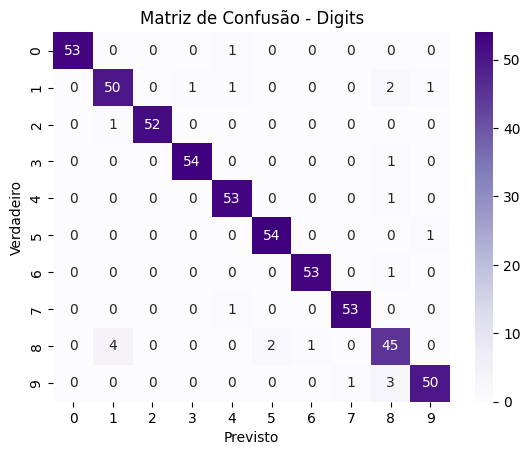

In [14]:
cm_digits = confusion_matrix(y_test, y_pred_digits)

sns.heatmap(cm_digits, annot=True, fmt="d", cmap="Purples",
            xticklabels=load_digits.target_names,
            yticklabels=load_digits.target_names)

plt.title("Matriz de Confusão - Digits")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()


## mnist

### Questões

#### e.
Aplique a regressão logística para avaliar o modelo de classificação dos dígitos de 0 a 9 utilizando o conjunto de dados específico para esse problema (por exemplo, MNIST).

In [15]:
# Baixando o dataset MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Separando features e target
X = mnist.data
y = mnist.target.astype('int')  # Converter target para inteiro

print("Shape dos dados:", X.shape)
print("Shape dos targets:", y.shape)


Shape dos dados: (70000, 784)
Shape dos targets: (70000,)


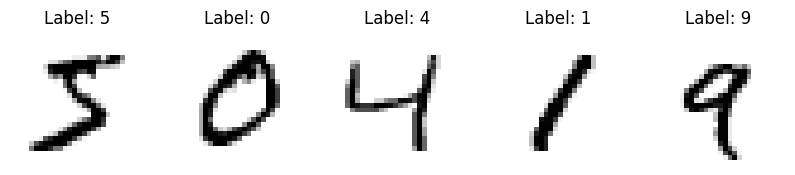

In [16]:
# Mostrar 5 imagens dos dígitos MNIST
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, X.reshape(-1, 28, 28)[:5], y[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Label: %i' % label)
plt.show()


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# modelo
model_mnist = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial', n_jobs=-1)

# Treino
model_mnist.fit(X_train, y_train)

# previsões
y_pred_mnist = model_mnist.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


#### f.
Calcule a acurácia, precisão e recall com base no desempenho do modelo para a classificação dos dígitos de 0 a 9.

In [18]:
print("Acurácia:", accuracy_score(y_test, y_pred_mnist))
print("Precisão (macro):", precision_score(y_test, y_pred_mnist, average='macro'))
print("Recall (macro):", recall_score(y_test, y_pred_mnist, average='macro'))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_mnist))


Acurácia: 0.9151428571428571
Precisão (macro): 0.9140552074625988
Recall (macro): 0.9138215451135778

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96      1381
           1       0.96      0.97      0.96      1575
           2       0.92      0.89      0.90      1398
           3       0.88      0.89      0.89      1428
           4       0.92      0.90      0.91      1365
           5       0.88      0.85      0.87      1263
           6       0.93      0.95      0.94      1375
           7       0.93      0.93      0.93      1459
           8       0.88      0.88      0.88      1365
           9       0.89      0.90      0.89      1391

    accuracy                           0.92     14000
   macro avg       0.91      0.91      0.91     14000
weighted avg       0.91      0.92      0.91     14000



#### g.
Plote a matriz de confusão dos resultados da classificação dos dígitos de 0 a 9 utilizando matplotlib ou seaborn.

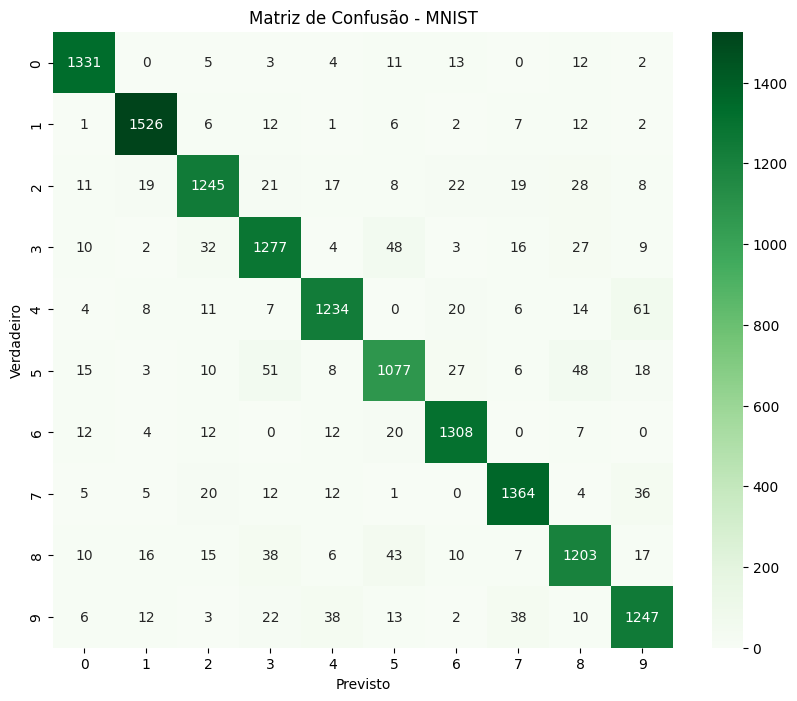

In [19]:
cm_mnist = confusion_matrix(y_test, y_pred_mnist)

plt.figure(figsize=(10,8))
sns.heatmap(cm_mnist, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.arange(10),
            yticklabels=np.arange(10))
plt.title("Matriz de Confusão - MNIST")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.show()
